# Correlation results visualization

In this notebook, it is shown how to visualize the results of the correlation analysis between the signals captured by different electrodes in the EEG dataset. 

Correlation results must be previously calculated using the `compute_correlation.py` script, while the functions to visualize the results are defined in the `utils/display_correlation_results.py` script.

In [1]:
# import libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
os.chdir('../src_code')
#from utils.display_correlation_results import plot_correlation_table
from utils.read_data import CHANNEL_NAMES
from utils.plot_functions import plot_correlation_differences, correlation_connectivity_graphs

### Pearson correlation coefficient

Plot **pearson correlation coefficient** results between some pairs of electrodes. The correlation coefficient is a measure of the linear relationship between two variables.

#### Mental state dataset 

See the result with respect to the mental state dataset (meaning both the recordings are used for each subject).

In [4]:
SAMPLE_DATA_FOLDER = '../eeg_data/'
CORRELATION_FOLDER = 'results_correlation' # where to take the correlation tables from
BANDS = ['delta', 'theta', 'alpha', 'beta', 'gamma']

selected_channels = ['FP1', 'FP2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'T3', 'T4', 'O1' ,'O2', 'F4', 'PZ', 'T3', 'O1']
all_channels = CHANNEL_NAMES

In [5]:
def retrieve_corr_tables(classification):
    """
    Save Pearson correlation tables as dictionaries whose keys are the channel pairs
    and values are the correlation coefficients for each class.
    """
    pc_class_0 = {}
    pc_class_1 = {}

    for band in BANDS:
        table_path_0 = f'{CORRELATION_FOLDER}/{band}_band_{classification}/class_0/correlation_table.pkl'
        table_path_1 = f'{CORRELATION_FOLDER}/{band}_band_{classification}/class_1/correlation_table.pkl'

        # open file and read tables
        with open(table_path_0, 'rb') as f:
            info = pickle.load(f)

        table_zscore_0, pvalues_0, table_pearson_0 = info['zscore'], info['pvalue'], info['pearson']

        with open(table_path_1, 'rb') as f:
            info = pickle.load(f)

        table_zscore_1, pvalues_1, table_pearson_1 = info['zscore'], info['pvalue'], info['pearson']

        for i, channel in enumerate(all_channels):
            for j in range(i+1, len(all_channels)):
                ch1 = all_channels[i]
                ch2 = all_channels[j]
                if ch1 in selected_channels and ch2 in selected_channels:
                    key = f'{ch1}-{ch2}'
                    # if ch1-ch2 entry does not exist, create it
                    if key not in pc_class_0:
                        pc_class_0[key] = []
                        pc_class_1[key] = []

                    pc_class_0[key].append(table_pearson_0[i][j])
                    pc_class_1[key].append(table_pearson_1[i][j])
    
    return pc_class_0, pc_class_1

pc_class_0, pc_class_1 = retrieve_corr_tables(classification='ms')

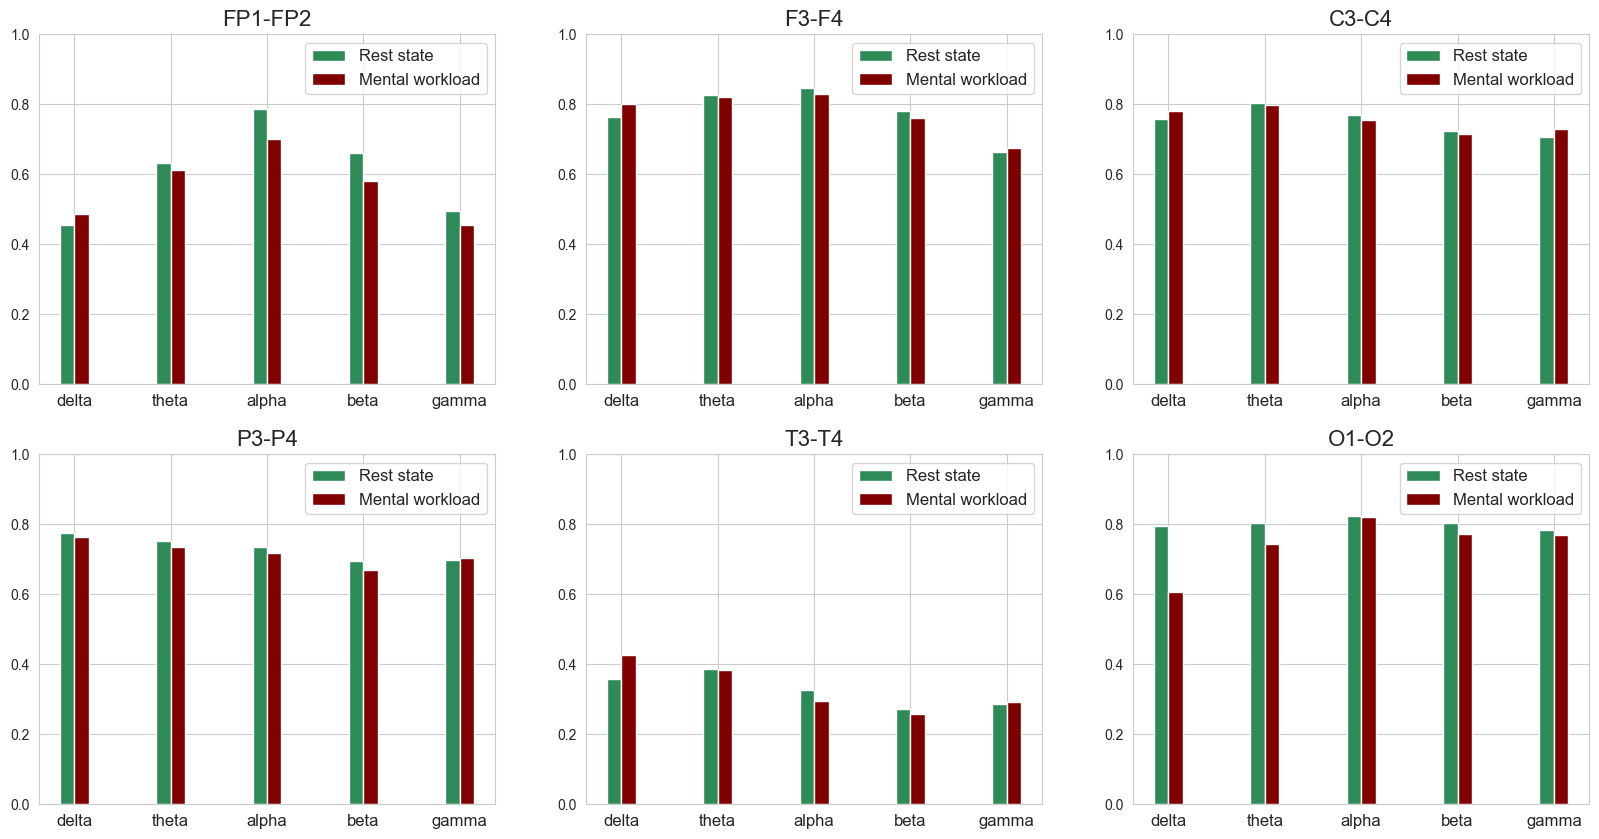

In [6]:
# plot histogram of correlation values
def plot_correlation_histogram(pc_class_0, pc_class_1):
    sns.set_style("whitegrid")

    keys = ['FP1-FP2', 'F3-F4', 'C3-C4', 'P3-P4', 'T3-T4', 'O1-O2']

    fig, axs = plt.subplots(2, 3, figsize=(20,10))

    for j in range(len(keys)):
        key = keys[j]
        class_0_ch = pc_class_0[key]
        class_1_ch = pc_class_1[key]
        
        bar_width = 0.15
        # plot histogram
        axs[j//3, j%3].bar(np.arange(len(class_0_ch)), class_0_ch, bar_width, label='Rest state', color='seagreen')
        # set min and max for y axis
        axs[j//3, j%3].set_ylim(0,1)
        axs[j//3, j%3].bar(np.arange(len(class_1_ch))+bar_width, class_1_ch, bar_width, label='Mental workload', color='maroon')
        axs[j//3, j%3].set_title(f'{key}', fontsize=16)
        axs[j//3, j%3].set_xticks(np.arange(len(class_0_ch))+bar_width/2)
        axs[j//3, j%3].set_xticklabels(BANDS, fontsize=12)
        axs[j//3, j%3].legend(fontsize=12)

    plt.show()

plot_correlation_histogram(pc_class_0, pc_class_1)

#### Counting quality dataset

See the result with respect to the counting quality dataset (meaning only the second recording is used for each subject).

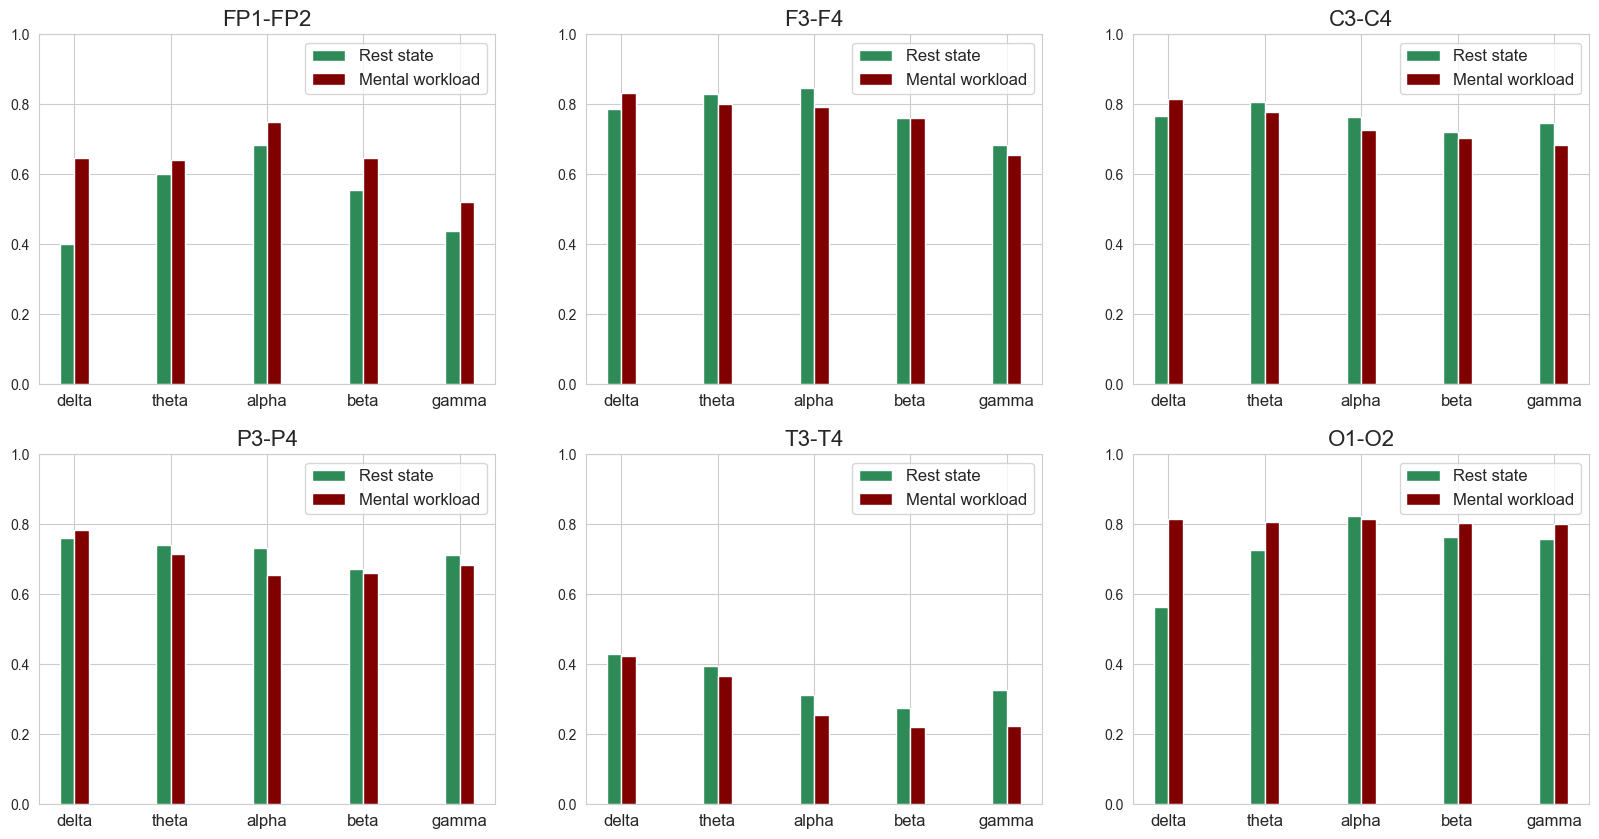

In [7]:
pc_class_0, pc_class_1 = retrieve_corr_tables(classification='cq')
plot_correlation_histogram(pc_class_0, pc_class_1)

## Differences in Pearson and Id-based correlation

To see if the Id-based correlation is different from the Pearson correlation, we can compare the results of both methods. The Id-based correlation is a measure of the similarity between two signals, while the Pearson correlation is a measure of the linear relationship between two signals.

We want to check if with the Id-based method it was possible to find some non-linear correlations that were not found with the Pearson method.

For each correlation folder a plot is generated showing the differences in the correlation values between the two methods.

In [3]:
plot_correlation_differences(CORRELATION_FOLDER, 'ms', pears_th=0.4, zscore_th=0.005)

Band: delta - Class: 0
-----------------------------------
Band: delta - Class: 1
-----------------------------------
Band: theta - Class: 0
-----------------------------------
Band: theta - Class: 1
-----------------------------------
Band: alpha - Class: 0
-----------------------------------
Band: alpha - Class: 1
-----------------------------------
Band: beta - Class: 0
-----------------------------------
Band: beta - Class: 1
-----------------------------------
Band: gamma - Class: 0
Channels FP1 and T3 have different correlation values  - Pearson: 0.3797692432446766, Zscore: -3.648761844511889
Channels FP1 and CZ have different correlation values  - Pearson: 0.35852066287854395, Zscore: -3.0756955144521223
Channels FP2 and T4 have different correlation values  - Pearson: 0.350553312946945, Zscore: -3.7260360715711567
Channels F4 and O1 have different correlation values  - Pearson: 0.2098152884921075, Zscore: -2.709620864675428
Channels F4 and PZ have different correlation values  

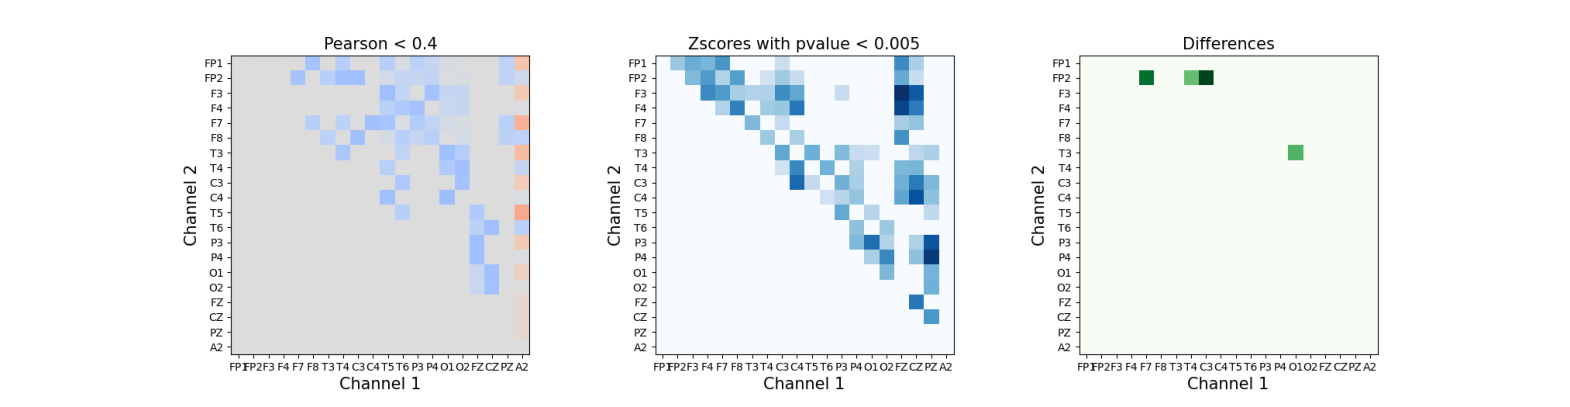

In [5]:
# plot one of the saved images
img_path = f'{CORRELATION_FOLDER}/full_spectrum_ms/class_0/corr_differences.png'
img = plt.imread(img_path)
plt.figure(figsize=(20,10))
plt.imshow(img)
plt.axis('off')
plt.show()

Repeat the same process for the counting quality dataset.

In [4]:
plot_correlation_differences(CORRELATION_FOLDER, 'cq', pears_th=0.4, zscore_th=0.005)

Band: delta - Class: 0
-----------------------------------
Band: delta - Class: 1
-----------------------------------
Band: theta - Class: 0
-----------------------------------
Band: theta - Class: 1
-----------------------------------
Band: alpha - Class: 0
-----------------------------------
Band: alpha - Class: 1
-----------------------------------
Band: beta - Class: 0
-----------------------------------
Band: beta - Class: 1
-----------------------------------
Band: gamma - Class: 0
Channels FP1 and CZ have different correlation values  - Pearson: 0.36773178913218446, Zscore: -3.1298201276930797
-----------------------------------
Band: gamma - Class: 1
Channels F4 and T3 have different correlation values  - Pearson: 0.39251776286385276, Zscore: -2.6384111652316036
Channels F7 and CZ have different correlation values  - Pearson: 0.39502580119377717, Zscore: -3.473780073769556
Channels F8 and T4 have different correlation values  - Pearson: 0.3333813153446565, Zscore: -3.9515700965

### Connectivity Graphs

Spatial visualization of **Id-based correlations**, meaning those correlations that are found using Id-based method and not by the Pearson method. 

In [3]:
# save the connectivity graphs for nonlinear correlation for each frequency band
subject = 1
edf_file = f'{SAMPLE_DATA_FOLDER}/Subject{subject:02}_2.edf'
correlation_connectivity_graphs(CORRELATION_FOLDER, edf_file, classification='ms', type='nonlinear')

Band: delta - Class: 0
Band: delta - Class: 1
Effective window size : 1.000 (s)
Effective window size : 1.000 (s)
Band: theta - Class: 0
Band: theta - Class: 1
Effective window size : 1.000 (s)
Effective window size : 1.000 (s)
Band: alpha - Class: 0
Band: alpha - Class: 1
Effective window size : 1.000 (s)
Effective window size : 1.000 (s)
Band: beta - Class: 0
Band: beta - Class: 1
Effective window size : 1.000 (s)
Effective window size : 1.000 (s)
Band: gamma - Class: 0
Band: gamma - Class: 1
Effective window size : 1.000 (s)
Effective window size : 1.000 (s)
Band: full_spectrum - Class: 0
Band: full_spectrum - Class: 1
Effective window size : 1.000 (s)
Effective window size : 1.000 (s)
Effective window size : 1.000 (s)
Effective window size : 1.000 (s)


Visualize the results for non linear correlations over all the frequency ranges.

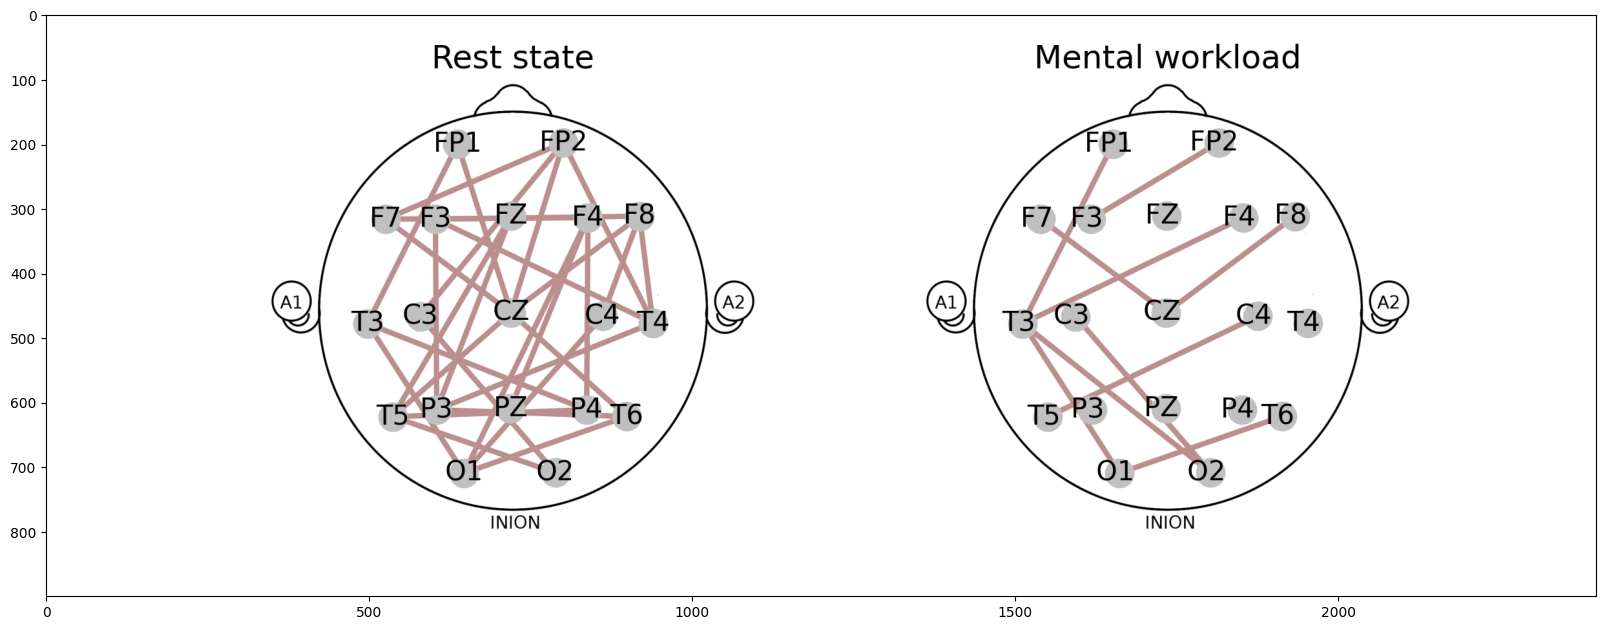

In [4]:
fig = plt.figure(figsize=(20, 10))
img = plt.imread(f'{CORRELATION_FOLDER}/_connectivity_graphs/nonlinear_ms_all_frequencies.png')
plt.imshow(img)